In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def draw(x1,x2):
    ln = plt.plot(x1,x2)

def sigmoid(score):
    return 1/(1+np.exp(-score))

 
def calculate_error(line_parameters, points , y):
    n = points.shape[0]
    p = sigmoid(points * line_parameters)
    # sum is not necessary
    cross_entropy = -(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent (line_parameters, points, y, alpha):
    n = points.shape[0]
    
    for i in range(2000):
        p = sigmoid(points * line_parameters)
        gradient = points.T*(p-y)*(alpha/n)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:,0].min(), points[:,0].max()])
        x2 = -b/w2 + (x1*(-w1/w2))

    model = np.array([line_parameters, x1, x2]) 
    
    return model



[[0.12447127]]


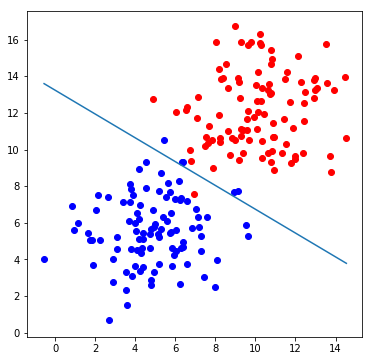

In [3]:
##################################################################################################
#                                        FEED FORWARD CONCEPT                                    #
##################################################################################################
n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)

#########################
# Define probabilities  #
#########################
top_region = np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts), bias]).T
# SOS
all_points = np.vstack((top_region, bottom_region))
# np.matrix = 3D array
w1 = - 0.2
w2 = -0.35
bias = 3.5
line_parameters = np.matrix([w1, w2, bias]).T
linear_combination= all_points * line_parameters 
probabilities= sigmoid(linear_combination)

#######################
# Example line model  #
#######################
# * Model : w1x1 + w2x2 + b = 0
# * y = labels
# * Since we have stacked bottom region first we declare all of these with label = 0 and the top region with label = 1
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts * 2, 1)



###################
#  Fit line model #
###################
model = gradient_descent(line_parameters, all_points, y , 0.06)
final_line_parameters, x1, x2 = model.reshape(3)


###################
# Calculate error #
###################
error = calculate_error(final_line_parameters, all_points, y)
print(error)


###################
#  Plot the line  #
###################
_, ax = plt.subplots(figsize = (6,6))
ax.scatter(top_region[:,0], top_region[:,1], color ='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color ='b')
draw(x1,x2)

plt.show()


Using TensorFlow backend.


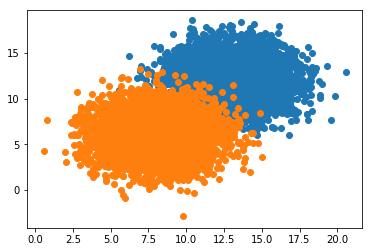

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
! export KERAS_BACKEND=tensorflow
n_pts = 5000
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [5]:
###################
#   Train Model   #
###################
# * NN have layers, so they are 'sequenced'
# * Every node in the layer is connected to every node in the preceding layer
# * So Dense will be used to consruct densely-connected NN layers
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,) , activation = 'sigmoid'))

# * Optimizer: Adam, previously gradient_descent is really costy so we have to use Stochastic Gradient Descent
adam = Adam(lr = 0.1)

# Loss: the results of the error function are minimized by Adam optimizer (back propagate)
# Metrics: to evaluate the model
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
# verbose = 1, to have a bar of progresss
# shuffle = 'true': so that it wont be stuck in local minimum 
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 50, shuffle = 'true')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
10000/10000 [==============================] - 0s 48us/step - loss: 0.7495 - acc: 0.7916
Epoch 2/50
10000/10000 [==============================] - 0s 34us/step - loss: 0.1831 - acc: 0.9650
Epoch 3/50
10000/10000 [==============================] - 0s 25us/step - loss: 0.1260 - acc: 0.9713
Epoch 4/50
10000/10000 [==============================] - 0s 30us/step - loss: 0.1077 - acc: 0.9712
Epoch 5/50
10000/10000 [==============================] - 0s 26us/step - loss: 0.0930 - acc: 0.9731
Epoch 6/50
10000/10000 [==============================] - 0s 24us/step - loss: 0.0883 - acc: 0.9705
Epoch 7/50
10000/10000 [==============================] - 0s 24us/step - loss: 0.0835 - acc: 0.9716
Epoch 8/50
10000/10000 [==============================] - 0s 25us/step - loss: 0.0816 - acc: 0.9722
Epoch 9/50
10000/10000 [==============================] - 0s 32us/step - loss: 0

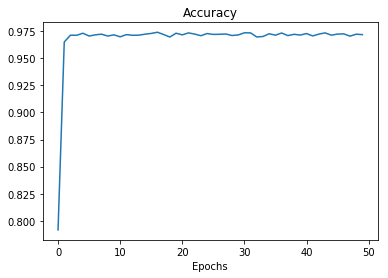

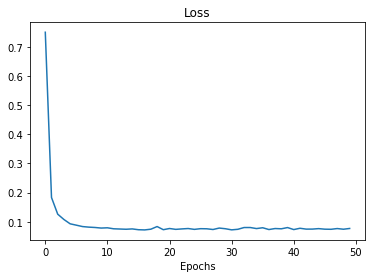

In [6]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

In [7]:
######################
#   Evaluate Model   #
######################
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1 , max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1 , max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel() , yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    # * z = magnitude of the probability
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
                         
                         

Prediction:  [[0.6021539]] %


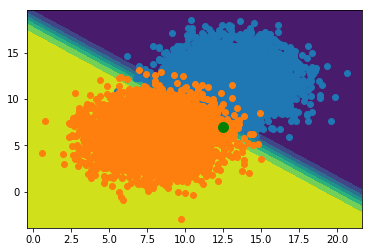

In [8]:
# * Countour zones represent increased threshold of probability
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 12.5
y = 7
point = np.array([[x, y]])
prediction = model.predict(point)
print("Prediction: ", prediction, "%")
plt.plot([x], [y], marker = "o", markersize = 10, color = "green")
